In [1]:
# Import numpy and matplotlib, and use jupyter magic to
# get plots directly in notebook
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Approximating derivatives with finite differences

The definition of the derivative of a function $f(x)$ is

$$ \frac{\mathrm{d} f(x)}{\mathrm{d} x} = \lim_{\Delta x \to 0} \frac{f(x+\Delta x) - f(x)}{\Delta x}. $$

If we don't take the limit $\Delta x \to 0$, but rather just stop at some small number, then we have (one example of) a finite difference approximation of a derivative:

$$ \left. \frac{\mathrm{d} f(x)}{\mathrm{d} x} \right|_{x} \approx \frac{f(x+\Delta x) - f(x)}{\Delta x}. $$

This is called a forward finite difference.

## Example: $f(x) = \sin(x)$

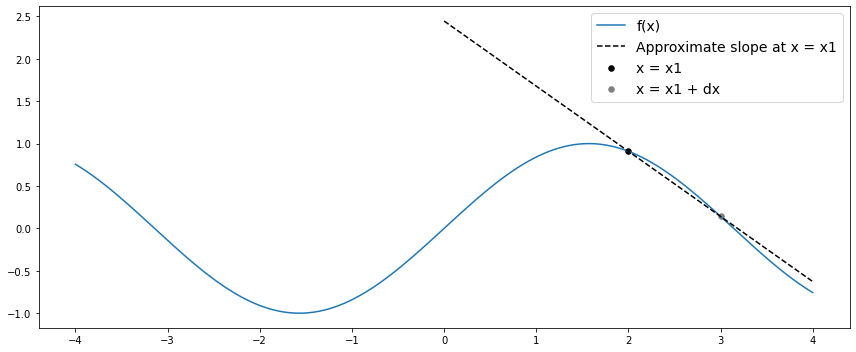

In [2]:
# define function
def f(x):
    return np.sin(x)

# plot the function
x = np.linspace(-4, 4, 1001)
fig = plt.figure(figsize = (12, 5))
plt.plot(x, f(x), label = 'f(x)')

# Find the derivative in some point, and plot the tangent line
x1 = 2
dx = 1
w = 2
df1 = (f(x1+dx) - f(x1))/dx
plt.plot([x1-w, x1+w], [f(x1)-w*df1, f(x1)+w*df1], '--', c = 'k', label = f'Approximate slope at x = x1')
plt.scatter(x1, f(x1), c = 'k', s = 30, label = f'x = x1')
plt.scatter(x1+dx, f(x1+dx), c = 'grey', s = 30, label = 'x = x1 + dx')

plt.legend(fontsize = 14)
plt.tight_layout()

## What is the error in the forward finite difference approximation?

Do a series expansion of $f(x)$ about the point $x + \Delta x$:

$$ f(x + \Delta x) = f(x) + \Delta(x) f'(x) + \mathcal{O}(\Delta x^2) $$

$$ \Rightarrow f'(x) = \frac{f(x + \Delta x) - f(x)}{\Delta(x)} + \mathcal{O}(\Delta x) $$

The error is proportional to $\Delta x$, hence this is called a first-order approximation (of the first derivative).

## Plot the error as a function of $\Delta x$ as an example

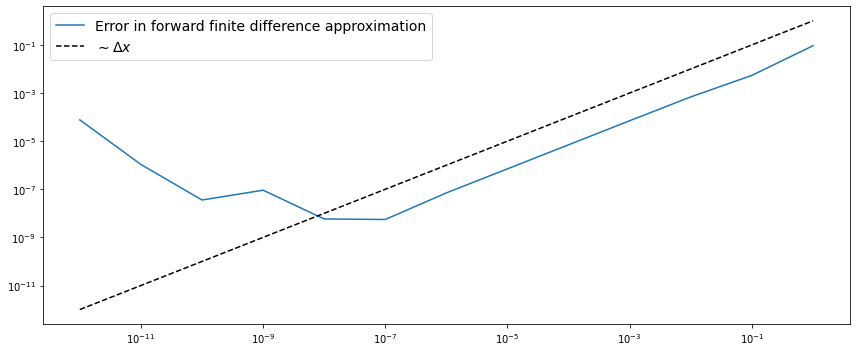

In [3]:
def f(x):
    return np.sin(x)

def dfdx_forward(f, x, dx):
    return (f(x+dx) - f(x))/dx

x0 = 3
stepsizes = np.logspace(-12, 0, 13)
# Calculate error relative to the analytic result
approximate =  dfdx_forward(f, x0, stepsizes)
exact = np.cos(x0)
errors = np.abs(approximate - exact)

fig = plt.figure(figsize = (12, 5))
plt.plot(stepsizes, errors, label ='Error in forward finite difference approximation')
plt.plot(stepsizes, stepsizes, '--', c = 'k', label = '$\sim \Delta x$')
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize = 14)
plt.tight_layout()

## Forward, backward and central finite differences:

Forward:
$$ \left. \frac{\mathrm{d} f(x)}{\mathrm{d} x} \right|_{x} \approx \frac{f(x+\Delta x) - f(x)}{\Delta x}. $$

Backward:
$$ \left. \frac{\mathrm{d} f(x)}{\mathrm{d} x} \right|_{x} \approx \frac{f(x) - f(x - \Delta x)}{\Delta x}. $$

Central:
$$ \left. \frac{\mathrm{d} f(x)}{\mathrm{d} x} \right|_{x} \approx \frac{f(x+\Delta x/2) - f(x - \Delta x / 2)}{\Delta x}. $$

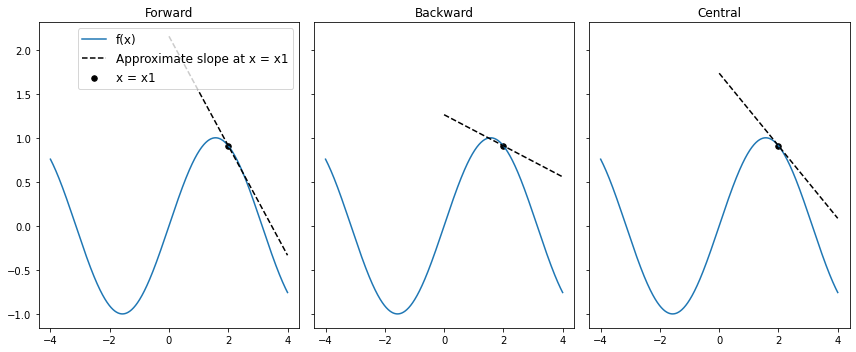

In [4]:
# define function
def f(x):
    return np.sin(x)

# plot the function
x = np.linspace(-4, 4, 1001)
fig, ax = plt.subplots(ncols = 3, figsize = (12, 5), sharex = True, sharey = True)
for a in ax:
    a.plot(x, f(x), label = 'f(x)')

# Find the derivative in some point, and plot the tangent line
x1 = 2
dx = 0.5
w = 2

# Forward
df1 = (f(x1+dx) - f(x1))/dx
ax[0].plot([x1-w, x1+w], [f(x1)-w*df1, f(x1)+w*df1], '--', c = 'k', label = f'Approximate slope at x = x1')
ax[0].scatter(x1, f(x1), c = 'k', s = 30, label = f'x = x1')

# Backward
df1 = (f(x1) - f(x1-dx))/dx
ax[1].plot([x1-w, x1+w], [f(x1)-w*df1, f(x1)+w*df1], '--', c = 'k', label = f'Approximate slope at x = x1')
ax[1].scatter(x1, f(x1), c = 'k', s = 30, label = f'x = x1')

# Central
df1 = (f(x1+dx/2) - f(x1-dx/2))/dx
ax[2].plot([x1-w, x1+w], [f(x1)-w*df1, f(x1)+w*df1], '--', c = 'k', label = f'Approximate slope at x = x1')
ax[2].scatter(x1, f(x1), c = 'k', s = 30, label = f'x = x1')

ax[0].legend(fontsize = 12)

ax[0].set_title('Forward')
ax[1].set_title('Backward')
ax[2].set_title('Central')

plt.subplots_adjust(wspace = 0)
plt.tight_layout()

## What is the error in the central finite difference approximation?

Do series expansions of $f(x)$ about the point $x + \Delta x/2$ and the point $x - \Delta x /2$:

$$ f(x + \Delta x/2) = f(x) + \frac{\Delta(x)}{2} f'(x) + \mathcal{O}(\Delta x^2) $$
$$ f(x - \Delta x/2) = f(x) - \frac{\Delta(x)}{2} f'(x) + \mathcal{O}(\Delta x^2) $$

Subtract the second equation from the first equation:

$$ \Rightarrow f'(x) = \frac{f(x + \Delta x/2) - f(x - \Delta x/2)}{\Delta(x)} + \mathcal{O}(\Delta x^2) $$

The error is proportional to $\Delta x^2$, hence this is called a second-order approximation (of the first derivative).

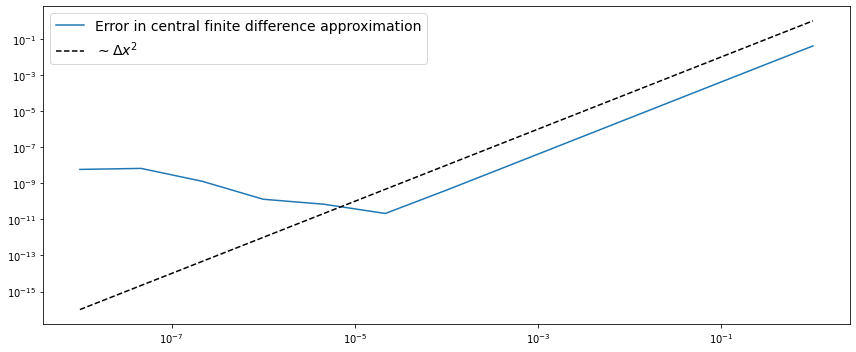

In [5]:
def f(x):
    return np.sin(x)

def dfdx_central(f, x, dx):
    return (f(x+dx/2) - f(x-dx/2))/dx

x0 = 3
stepsizes = np.logspace(-8, 0, 13)
# Calculate error relative to the correct solution
approximate =  dfdx_central(f, x0, stepsizes)
exact = np.cos(x0)
errors = np.abs(approximate - exact)

fig = plt.figure(figsize = (12, 5))
plt.plot(stepsizes, errors, label ='Error in central finite difference approximation')
plt.plot(stepsizes, stepsizes**2, '--', c = 'k', label = '$\sim \Delta x^2$')
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize = 14)
plt.tight_layout()

## Second derivatives:

You can higher derivatives by applying the forward, backward and central schemes recursively (since the second derivative is the derivative of the derivative, etc). For the forward scheme: First approximate the derivative in the points $x$ and $x + \Delta x$, and then use those values to approximate the second derivative in $x$:

$$ \left. \frac{\mathrm{d} f(x)}{\mathrm{d} x} \right|_{x + \Delta x} \approx \frac{f(x+2\Delta x) - f(x+\Delta x)}{\Delta x}. $$


$$ \left. \frac{\mathrm{d} f(x)}{\mathrm{d} x} \right|_{x} \approx \frac{f(x+\Delta x) - f(x)}{\Delta x}. $$


$$ \Rightarrow \left. \frac{\mathrm{d^2} f(x)}{\mathrm{d} x^2} \right|_{x} \approx \frac{\frac{f(x+2\Delta x) - f(x+ \Delta x)}{\Delta x} - \frac{f(x+\Delta x) - f(x)}{\Delta x} }{\Delta x}.$$


$$ \Rightarrow \left. \frac{\mathrm{d^2} f(x)}{\mathrm{d} x^2} \right|_{x} \approx \frac{f(x+2\Delta x) - 2f(x+ \Delta x) + f(x)}{\Delta x^2}.$$

Similar approach for the backward scheme yields:

$$ \Rightarrow \left. \frac{\mathrm{d^2} f(x)}{\mathrm{d} x^2} \right|_{x} \approx \frac{f(x) - 2f(x-\Delta x) + f(x-2\Delta x)}{\Delta x^2}.$$

And for the central scheme:

$$ \Rightarrow \left. \frac{\mathrm{d^2} f(x)}{\mathrm{d} x^2} \right|_{x} \approx \frac{f(x+\Delta x) - 2f(x) + f(x-\Delta x)}{\Delta x^2}.$$


## Check convergence numerically

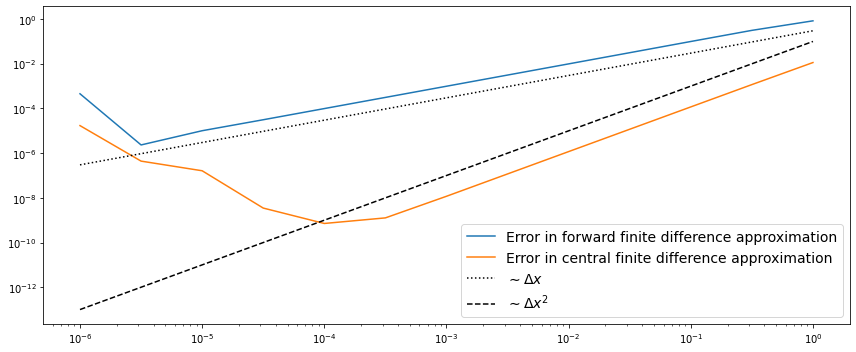

In [6]:
def f(x):
    return np.sin(x)

def d2fdx2_central(f, x, dx):
    return (f(x+dx) -2*f(x) + f(x-dx))/dx**2

def d2fdx2_forward(f, x, dx):
    return (f(x+2*dx) -2*f(x+dx) + f(x))/dx**2


x0 = 3
stepsizes = np.logspace(-6, 0, 13)
# Calculate error relative to the correct solution
exact = -np.sin(x0)
approximate_central =  d2fdx2_central(f, x0, stepsizes)
errors_central = np.abs(approximate_central - exact)
approximate_forward =  d2fdx2_forward(f, x0, stepsizes)
errors_forward = np.abs(approximate_forward - exact)

fig = plt.figure(figsize = (12, 5))
plt.plot(stepsizes, errors_forward, label ='Error in forward finite difference approximation')
plt.plot(stepsizes, errors_central, label ='Error in central finite difference approximation')

plt.plot(stepsizes, 0.3*stepsizes, ':', c = 'k', label = '$\sim \Delta x$')
plt.plot(stepsizes, 0.1*stepsizes**2, '--', c = 'k', label = '$\sim \Delta x^2$')
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize = 14)
plt.tight_layout()

## General advice

* Finite difference approximations are very useful when you only know a function at a set of discrete points.
* If you know the function analytically, consider the following:
 * Taking the difference of two large numbers, and dividing by a small number ($\Delta x$), is essentially a worst-case scenario for loss of numerical precision. This is especially bad for higher derivatives, since you will divide by powers of $\Delta x$.
 * If you can easily obtain the analytical derivative, that is usualy better.
 * If the function is analytical, but very complicated, consider trying a tool for symbolic mathematics, such as Mathematica, Wolfram Alpha, Maple, or Sympy (which is a free python library).

## A brief sympy example

In [7]:
from sympy import symbols, exp, cos, sin, log, diff
# Create some symbols
a, b, c, x = symbols('a b c x')

# Define a complicated function
f = a*log(b*x + sin(x))*exp(c*x)

# Calculate the first derivative with respect to x
diff(f, x, 1)

a*c*exp(c*x)*log(b*x + sin(x)) + a*(b + cos(x))*exp(c*x)/(b*x + sin(x))